# Data Drift Test Notebook for Tabular Data

This notebook implements a series of tests and measures to determine drift between a baseline and production dataset.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import random
from scipy.stats import ks_2samp
from utils import ( 
                    numerical_data_distribution_plot, 
                    categorical_grouped_bar_plot, 
                    jensen_shannon_distance_numerical, 
                    jensen_shannon_distance_categorical, 
                    normed_wasserstein_distance_numerical,
             )
from yaml import safe_load
config = safe_load(open('config.yml','rb'))

### Numerical Data

In [2]:
observations = 100_000
w = np.random.normal(50, 15, int(observations)) # identical with x
x = np.random.normal(50, 15, observations) # reference
y = np.random.normal(53, 17, int(observations)) # minor drift
z = np.random.normal(62, 20, int(observations/10)) # major drift 

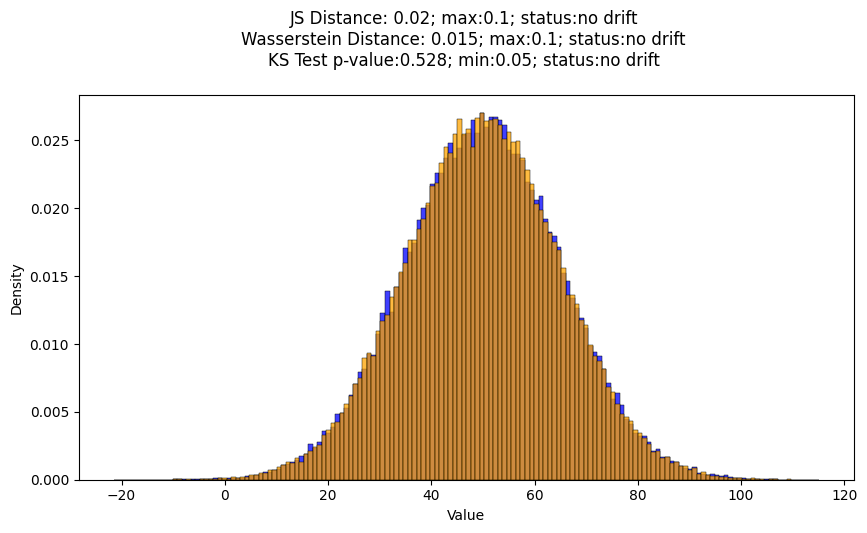

In [3]:
g = numerical_data_distribution_plot(x, w)

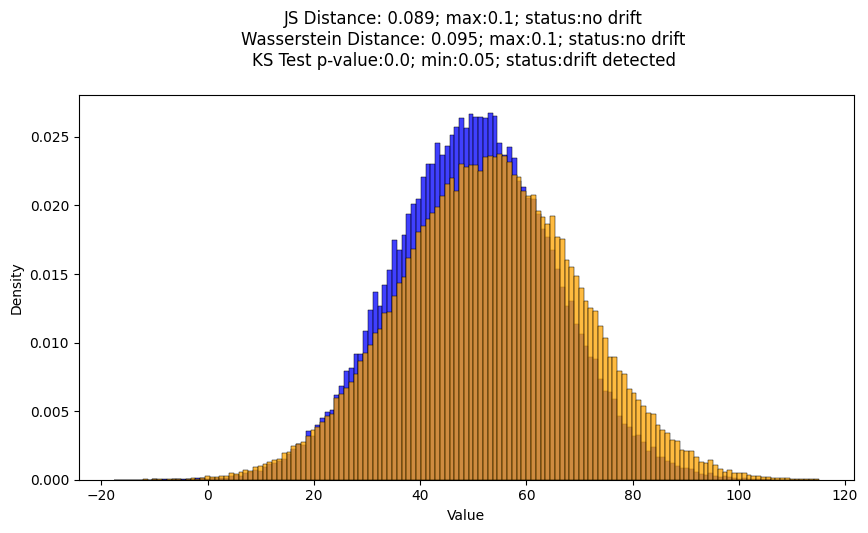

In [4]:
g = numerical_data_distribution_plot(x, y)


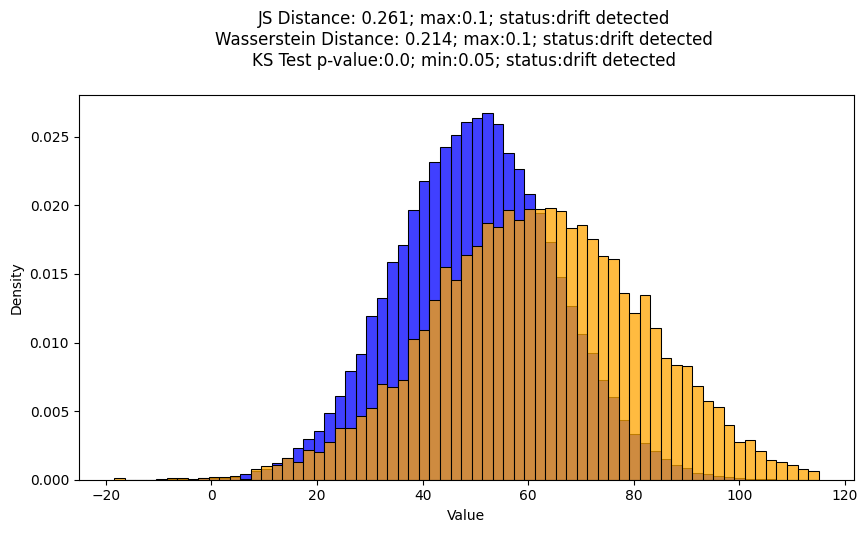

In [5]:
g = numerical_data_distribution_plot(x, z)

### Categorical Data

In [6]:
# Sample strings to generate categorical variables: a and b differ slightly. Strong difference between a versus c
a=('a'* 100 + 
   'b'* 100 + 
   'c'* 100 + 
   'd'* 100 + 
   'e'* 100 + 
   'f'* 100 + 
   'g'* 100 + 
   'h'* 100)

b=('a'* 97 + 
   'b'* 105 + 
   'c'* 99 + 
   'd'* 98 + 
   'e'* 101 + 
   'f'* 102 + 
   'g'* 97 + 
   'h'* 103)

c=('a'* 10 + 
   'b'* 11 + 
   'c'* 9 + 
   'd'* 10 + 
   'e'* 10 + 
   'f'* 10 + 
   'g'* 13 + 
   'h'* 10)

d=('a'* 180 + 
   'b'* 80 + 
   'c'* 70 + 
   'd'* 170 + 
   'e'* 200 + 
   'f'* 10 + 
   'g'* 130 + 
   'h'* 100)


e=('a'* 100 + 
   'b'* 100 + 
   'c'* 100 + 
   'd'* 100 + 
   'e'* 100 + 
   'f'* 100 + 
   'g'* 100 +
   'h'* 1  
)

# convert to lists
a_list = [letter for letter in a]
b_list = [letter for letter in b]
c_list = [letter for letter in c]
d_list = [letter for letter in d]
e_list = [letter for letter in e]

# shuffle lists
random.shuffle(a_list)
random.shuffle(b_list)
random.shuffle(c_list)
random.shuffle(d_list)
random.shuffle(e_list)

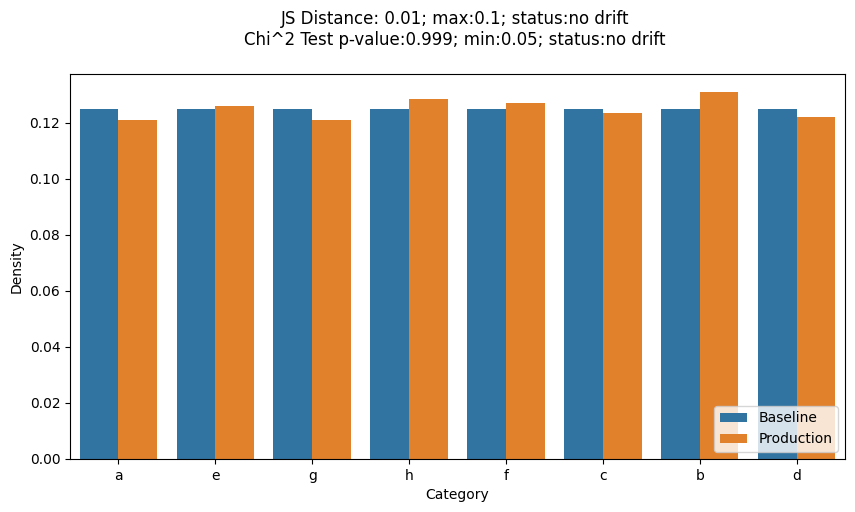

In [7]:
g = categorical_grouped_bar_plot(a_list, b_list)

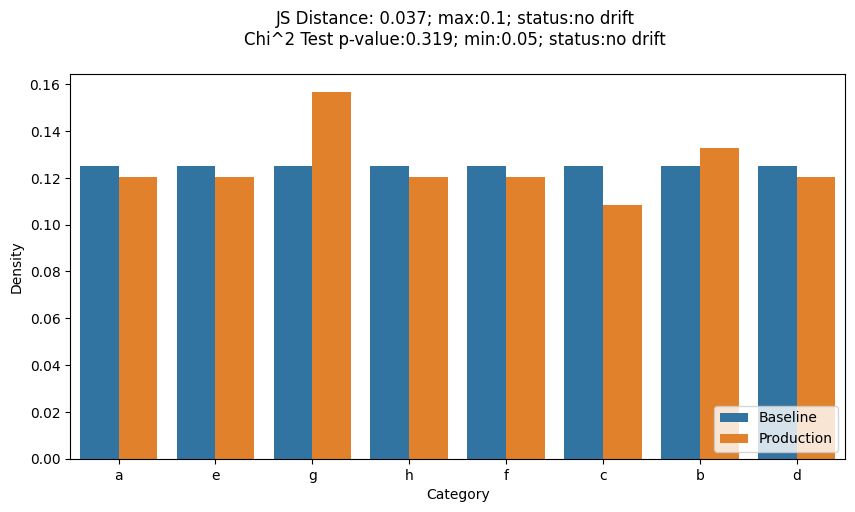

In [8]:
g = categorical_grouped_bar_plot(a_list, c_list)

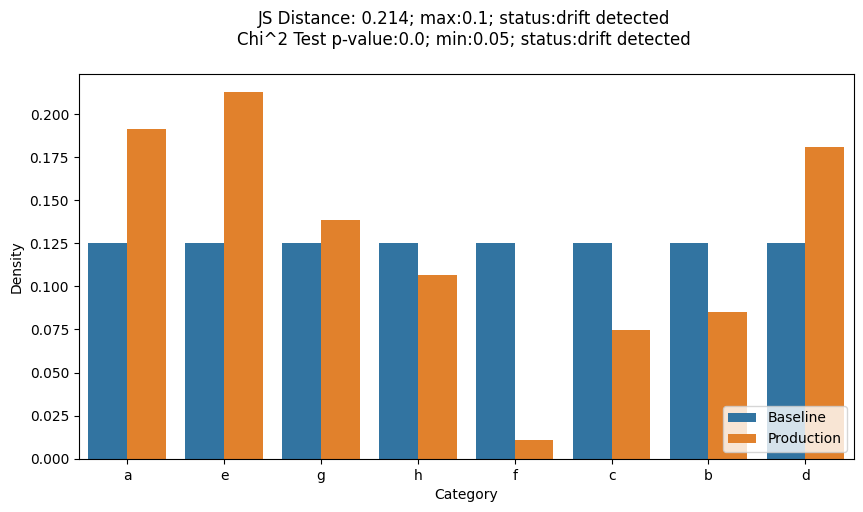

In [9]:
g = categorical_grouped_bar_plot(a_list, d_list)

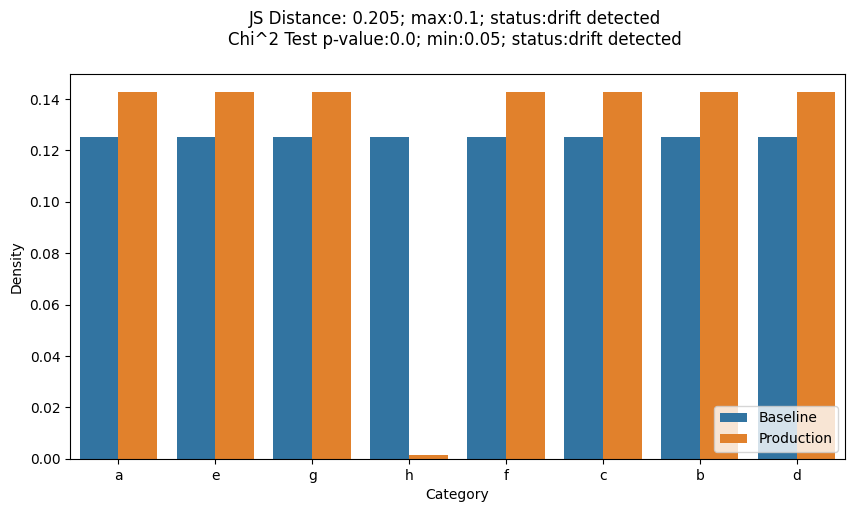

In [10]:
g = categorical_grouped_bar_plot(a_list, e_list)